# Intracellular node frequency analysis: HemeThrombKG/HemeKG 2.0 - pathway overlay

This notebook overlays intracellular nodes from the hemeThrombKG/HemeKG 2.0 and coagulation pathways where node sizes reflect their frequency in the HemeThrombKG or HemeKG 2.0.

In [1]:
import getpass
import json
import sys
import time
import urllib.request

import igraph
import pandas as pd
import pybel

from network_utils import get_bel_graph, get_node_counts, render_graph

/Users/sarahmubeen/Library/Python/3.10/lib/python/site-packages/pybel/struct/operations.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sys.version

'3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:20) [Clang 12.0.5 (clang-1205.0.22.11)]'

In [3]:
getpass.getuser()

'sarahmubeen'

In [4]:
time.asctime()

'Thu Jul  7 18:48:44 2022'

In [5]:
pybel.get_version()

'0.15.5'

### Load HemeThrombKG

In [6]:
review_kg = pybel.from_bel_script('../bel_files/hemeThrombKG.bel')

downloading namespaces:   0%|          | 0/20 [00:00<?, ?it/s]

downloading annotations:   0%|          | 0/11 [00:00<?, ?it/s]

### Load HemeKG

In [7]:
with urllib.request.urlopen('https://raw.githubusercontent.com/hemekg/hemekg/master/hemekg/_cache.bel.nodelink.json') as url:
    data = json.loads(url.read().decode())
    
    heme_kg = pybel.from_nodelink(data)
    

### Load pathway KGs

In [8]:
coagulation_pathway = get_bel_graph('coagulation_pathways')
intrinsic_pathway = get_bel_graph('intrinsic_pathway_reactome')
common_pathway = get_bel_graph('common_pathway_reactome')
kegg_pathway = get_bel_graph('platelet_activation_kegg')
plug_pathway = get_bel_graph('plug_formation_reactome')

### Load intracellular proteins

In [9]:
ic_proteins_df = pd.read_csv('../node_type_files/intracellular_proteins.tsv', sep='\t', header=None)
db_proteins = ic_proteins_df[0].to_list()

### Merge pathways with HemeThrombKG

In [10]:
# Merge review and coagulation graph
review_coagulation_graph = pybel.union([review_kg, coagulation_pathway])

# Merge review and common pathway graph
review_common_graph = pybel.union([review_kg, common_pathway])

# Merge review and kegg pathway graph
review_kegg_graph = pybel.union([review_kg, kegg_pathway])

# Merge review and plug pathway graph
review_plug_graph = pybel.union([review_kg, plug_pathway])


### Merge pathways with hemeKG 2.0

In [11]:
# Merge reviewKG and hemeKG graph
heme_kg_v2 = pybel.union([review_kg, heme_kg])

# Merge hemeKG 2.0 and coagulation graph
merged_coagulation_graph = pybel.union([heme_kg_v2, coagulation_pathway])

# Merge hemeKG 2.0 and plug pathway graph
merged_intrinsic_graph = pybel.union([heme_kg_v2, intrinsic_pathway])

# Merge hemeKG 2.0 and common pathway graph
merged_common_graph = pybel.union([heme_kg_v2, common_pathway])

# Merge hemeKG 2.0 and kegg pathway graph
merged_kegg_graph = pybel.union([heme_kg_v2, kegg_pathway])

# Merge hemeKG 2.0 and plug pathway graph
merged_plug_graph = pybel.union([heme_kg_v2, plug_pathway])


### Normalize node size values 

In [12]:
normalize_vals_dict = {'actual': {'lower': 1, 'upper': 15}, 'desired': {'lower': 1, 'upper': 20}}

## Render graphs

### Merged coagulation pathways -  HemeThrombKG

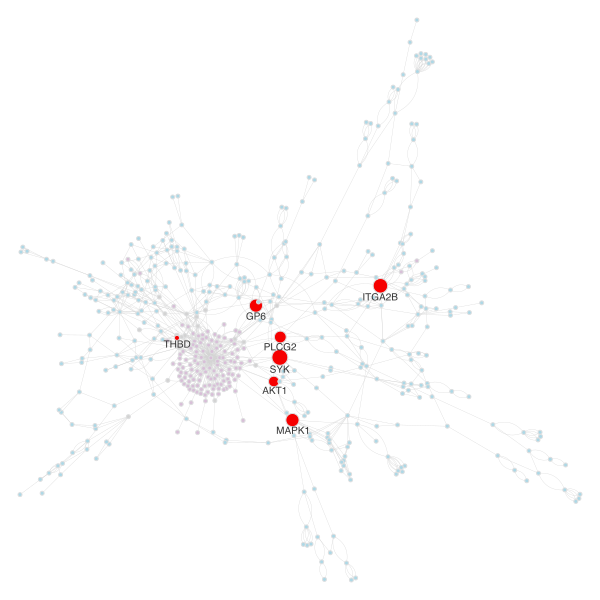

In [13]:
coagulation_graph, visual_style = render_graph(
    review_coagulation_graph, 
    coagulation_pathway, 
    review_kg,
    db_proteins,
    normalize_vals_dict,
)

layout = coagulation_graph.layout("fr")
igraph.plot(coagulation_graph, layout=layout, **visual_style)

### Merged coagulation pathways -  hemeKG 2.0

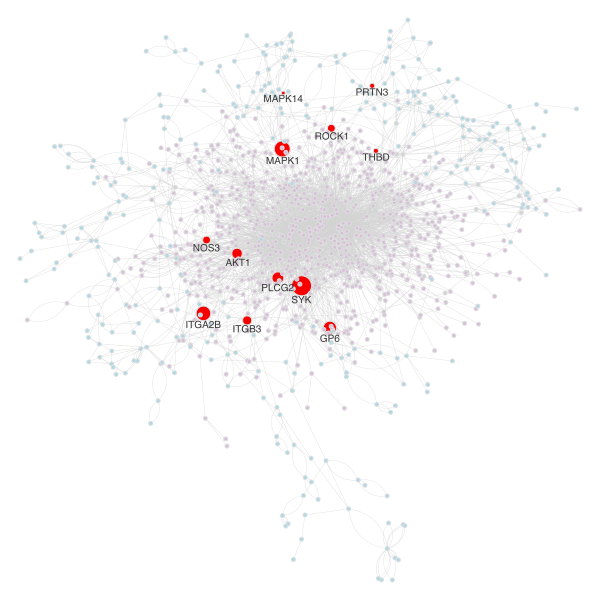

In [14]:
coagulation_graph, visual_style = render_graph(
    merged_coagulation_graph, 
    coagulation_pathway, 
    heme_kg_v2,
    db_proteins,
    normalize_vals_dict,
)

layout = coagulation_graph.layout("fr")
igraph.plot(coagulation_graph, layout=layout, **visual_style)

### Common pathway - HemeThrombKG

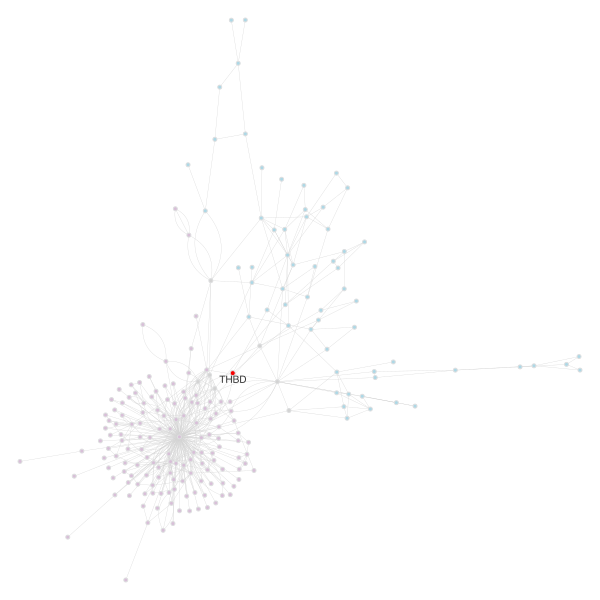

In [15]:
common_graph, visual_style = render_graph(
    review_common_graph, 
    common_pathway, 
    review_kg,
    db_proteins,
    normalize_vals_dict,
)

layout = common_graph.layout("fr")
igraph.plot(common_graph, layout=layout, **visual_style)

### Common pathway -  hemeKG 2.0

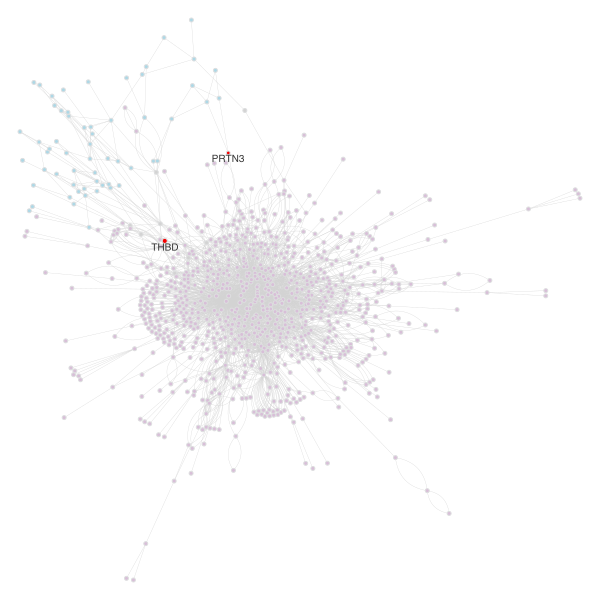

In [16]:
common_graph, visual_style = render_graph(
    merged_common_graph, 
    common_pathway, 
    heme_kg_v2,
    db_proteins,
    normalize_vals_dict,
)

layout = common_graph.layout("fr")
igraph.plot(common_graph, layout=layout, **visual_style)

### KEGG pathway - HemeThrombKG

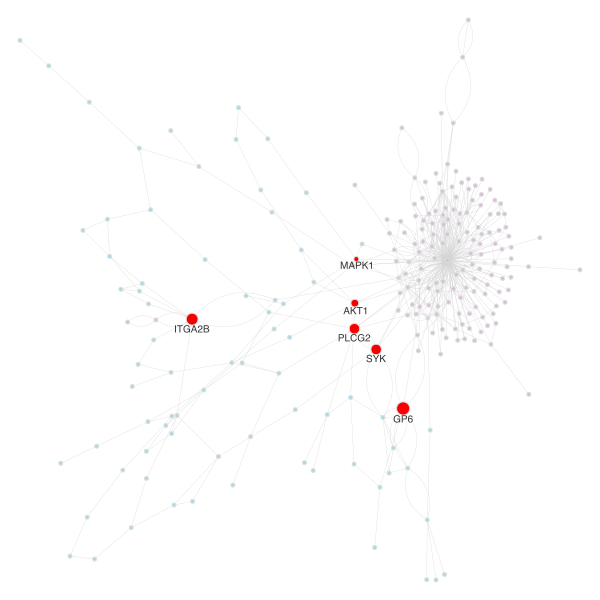

In [17]:
kegg_graph, visual_style = render_graph(
    review_kegg_graph, 
    kegg_pathway, 
    review_kg,
    db_proteins,
    normalize_vals_dict,
)

layout = kegg_graph.layout("fr")
igraph.plot(kegg_graph, layout=layout, **visual_style)

### KEGG pathway - hemeKG 2.0

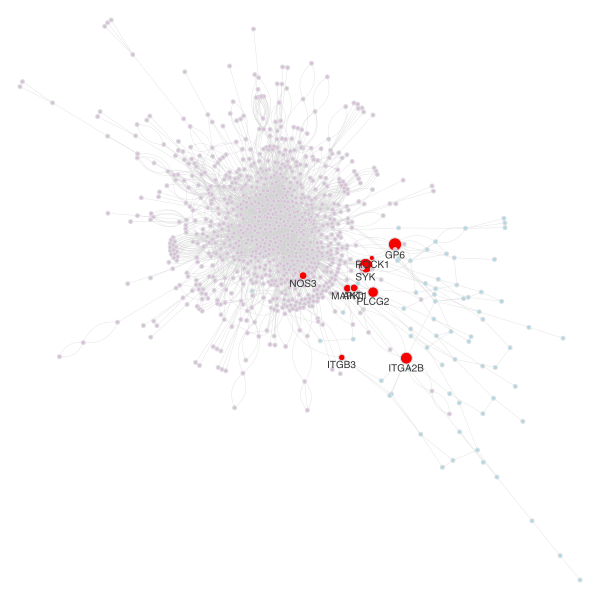

In [18]:
kegg_graph, visual_style = render_graph(
    merged_kegg_graph, 
    kegg_pathway, 
    heme_kg_v2,
    db_proteins,
    normalize_vals_dict,
)

layout = kegg_graph.layout("fr")
igraph.plot(kegg_graph, layout=layout, **visual_style)